In [1]:
import numpy as np
import pandas as pd
import scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

In [2]:
dados = pd.read_csv('Dados/dados200.txt', sep="\t", decimal=",",header = 0)
dadosArray = np.array(dados)
xData = []
yData = []
Dy = []

for i in dadosArray:
    xData.append(float(i[0]))
    yData.append(float(i[1]))
    Dy.append(float(i[2]))

def func(x, i0, a):
    return i0*((np.cos(x + a))**2)

popt, pcov = curve_fit(
    f = func,
    xdata = xData,
    ydata = yData,
    sigma = Dy
)

In [3]:
i0_p, a_p = popt
perr = np.sqrt(np.diag(pcov))
Di0, Da = perr
print("I_0:", i0_p,"+-", Di0)
print("Alpha:", a_p,"+-", Da)

I_0: 4.174121829680892 +- 0.016509863538672648
Alpha: -0.39685124505885816 +- 0.0034770464734514084


/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_14560/4016381571.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(xData, yData, 'D', marker = '.', color = 'red')


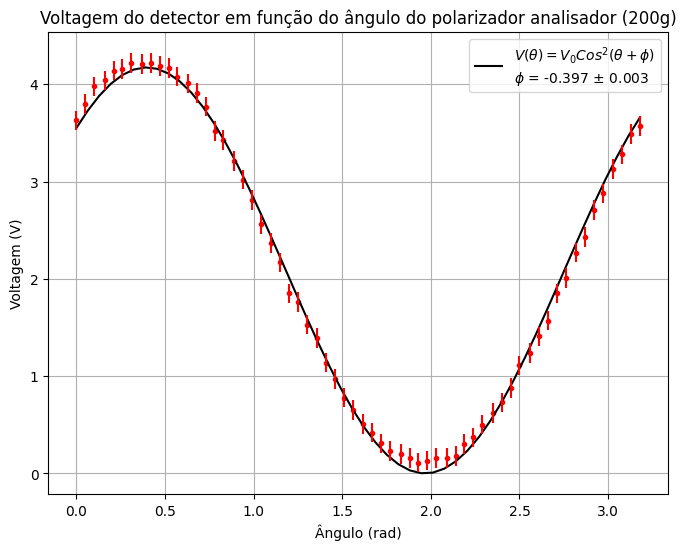

In [4]:
def dataPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    grafico = f.add_subplot(111)

    # plot dos pontos
    grafico.plot(xData, yData, 'D', marker = '.', color = 'red')

    # define ajuste a partir dos parametros
    xModel = np.linspace(min(xData), max(xData))
    yModel = func(xModel, i0_p, a_p)

    # plot do ajuste
    grafico.plot(xModel, yModel, label= f"$V(\\theta) = V_0 Cos^2 (\\theta + \\phi) $ \n$\\phi$ = {a_p:.3f} $\pm$ {Da:.3f}", color = 'black')
    grafico.errorbar(xData, yData, yerr = Dy, ls='None', color = 'red')

    grafico.grid(True)
    grafico.set_xlabel('Ângulo (rad)') # eixo x
    grafico.set_ylabel('Voltagem (V)') # eixo y
    grafico.set_title('Voltagem do detector em função do ângulo do polarizador analisador (200g)') #título
    grafico.legend(loc = 'upper right')
    
    plt.savefig('200g.png')
    plt.show()
    plt.close('all')

graphWidth = 800
graphHeight = 600
dataPlot(graphWidth, graphHeight)

# Resíduos:

yAjuste = []
for i in xData:
    np.append(yAjuste,func(i, i0_p, a_p))

residuosAbsolutos = []
for i in yAjuste:
    np.append(residuosAbsolutos, yData[i] - yAjuste[i])

/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_14560/3720777541.py:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(xData, residuosAbsolutos, 'D', marker = '.', color = 'red')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


62
Chi quadrado = 39.04


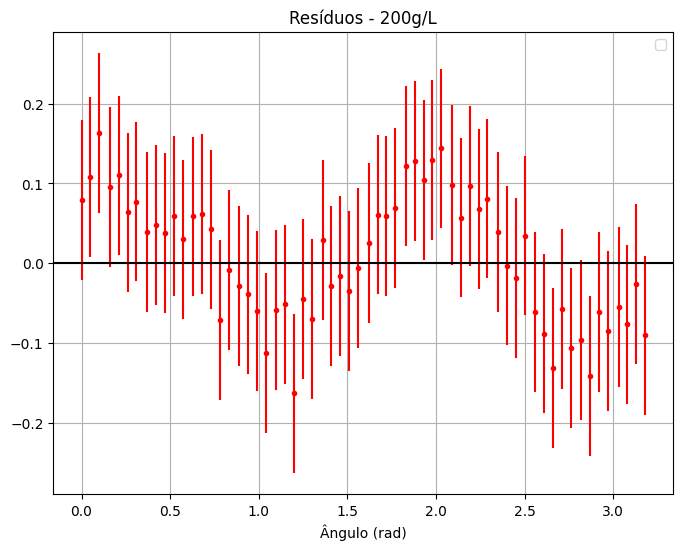

In [5]:
# Resíduos:
def x0(x):
    return 0

yAjuste = []
for i in xData:
    yAjuste.append(func(i, i0_p, a_p))

residuosAbsolutos = []
for i, ponto in enumerate(yAjuste):
    residuosAbsolutos.append(yData[i] - yAjuste[i])

chiQuadrado2 = 0

print(len(xData))

for i, residuo in enumerate(residuosAbsolutos):
    chiQuadrado2 += residuosAbsolutos[i]**2/Dy[i]**2

print("Chi quadrado = %1.2f" % chiQuadrado2)

def dataPlot2(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    grafico = f.add_subplot(111)
    # plot dos resíduos
    grafico.plot(xData, residuosAbsolutos, 'D', marker = '.', color = 'red')

    # plot das barras de erro
    grafico.errorbar(xData, residuosAbsolutos, yerr = Dy, ls='None', color = 'red')

    grafico.grid(True)
    grafico.axhline(0,0, max(xData), color = 'black')
    grafico.set_xlabel('Ângulo (rad)') # eixo x
    grafico.set_title('Resíduos - 200g/L') #título
    grafico.legend(loc = 'upper right')
    
    plt.savefig('Resíduos200.png')
    plt.show()
    plt.close('all')

graphWidth = 800
graphHeight = 600
dataPlot2(graphWidth, graphHeight)

In [6]:
dados = pd.read_csv('Dados/dados300.txt', sep="\t", decimal=",",header = 0)
dadosArray = np.array(dados)
xData = []
yData = []
Dy = []

for i in dadosArray:
    xData.append(float(i[0]))
    yData.append(float(i[1]))
    Dy.append(float(i[2]))

def func(x, i0, a):
    return i0*((np.cos(x + a))**2)

popt, pcov = curve_fit(
    f = func,
    xdata = xData,
    ydata = yData,
    sigma = Dy
)

In [7]:
i0_p, a_p = popt
perr = np.sqrt(np.diag(pcov))
Di0, Da = perr
print("I_0:", i0_p,"+-", Di0)
print("Alpha:", a_p,"+-", Da)

I_0: 3.1047884981106946 +- 0.009344173969605893
Alpha: -0.4676249015297857 +- 0.0026267560146527227


/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_14560/2360177737.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(xData, yData, 'D', marker = '.', color = 'red')


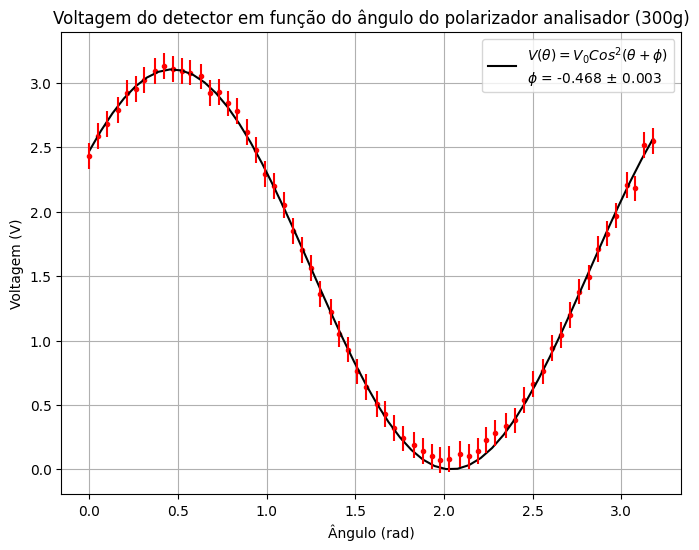

In [8]:
def dataPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    grafico = f.add_subplot(111)

    # plot dos pontos
    grafico.plot(xData, yData, 'D', marker = '.', color = 'red')

    # define ajuste a partir dos parametros
    xModel = np.linspace(min(xData), max(xData))
    yModel = func(xModel, i0_p, a_p)

    # plot do ajuste
    grafico.plot(xModel, yModel, label= f"$V(\\theta) = V_0 Cos^2 (\\theta + \\phi) $ \n$\\phi$ = {a_p:.3f} $\pm$ {Da:.3f}", color = 'black')
    grafico.errorbar(xData, yData, yerr = Dy, ls='None', color = 'red')

    grafico.grid(True)
    grafico.set_xlabel('Ângulo (rad)') # eixo x
    grafico.set_ylabel('Voltagem (V)') # eixo y
    grafico.set_title('Voltagem do detector em função do ângulo do polarizador analisador (300g)') #título
    grafico.legend(loc = 'upper right')
    
    plt.savefig('300g.png')
    plt.show()
    plt.close('all')

graphWidth = 800
graphHeight = 600
dataPlot(graphWidth, graphHeight)

# Resíduos:

yAjuste = []
for i in xData:
    np.append(yAjuste,func(i, i0_p, a_p))

residuosAbsolutos = []
for i in yAjuste:
    np.append(residuosAbsolutos, yData[i] - yAjuste[i])

/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_14560/2435100545.py:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(xData, residuosAbsolutos, 'D', marker = '.', color = 'red')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


62
Chi quadrado = 12.42


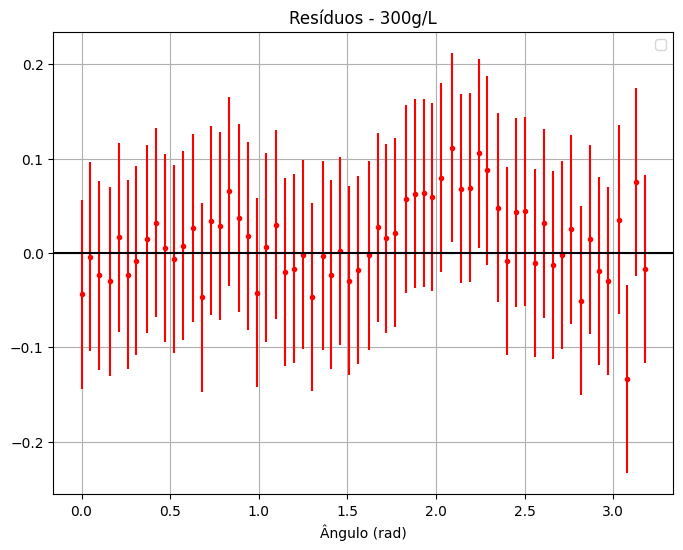

In [9]:
# Resíduos:
def x0(x):
    return 0

yAjuste = []
for i in xData:
    yAjuste.append(func(i, i0_p, a_p))

residuosAbsolutos = []
for i, ponto in enumerate(yAjuste):
    residuosAbsolutos.append(yData[i] - yAjuste[i])

chiQuadrado2 = 0

print(len(xData))

for i, residuo in enumerate(residuosAbsolutos):
    chiQuadrado2 += residuosAbsolutos[i]**2/Dy[i]**2

print("Chi quadrado = %1.2f" % chiQuadrado2)

def dataPlot2(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    grafico = f.add_subplot(111)
    # plot dos resíduos
    grafico.plot(xData, residuosAbsolutos, 'D', marker = '.', color = 'red')

    # plot das barras de erro
    grafico.errorbar(xData, residuosAbsolutos, yerr = Dy, ls='None', color = 'red')

    grafico.grid(True)
    grafico.axhline(0,0, max(xData), color = 'black')
    grafico.set_xlabel('Ângulo (rad)') # eixo x
    grafico.set_title('Resíduos - 300g/L') #título
    grafico.legend(loc = 'upper right')
    
    plt.savefig('Resíduos300.png')
    plt.show()
    plt.close('all')

graphWidth = 800
graphHeight = 600
dataPlot2(graphWidth, graphHeight)

I_0: 4.67452687396049 +- 0.01947343331106929
phi: -0.5066999197593269 +- 0.003621569539657315


/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_14560/1346523754.py:31: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(xData, yData, 'D', marker = '.', color = 'red')


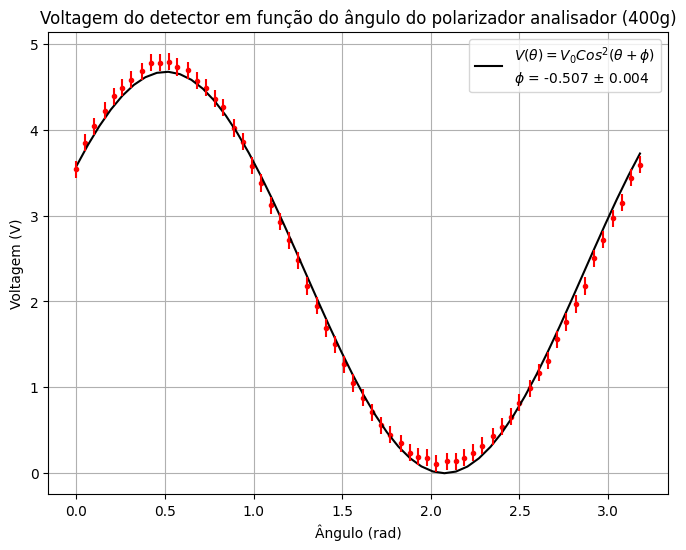

In [10]:
dados = pd.read_csv('Dados/dados400.txt', sep="\t", decimal=",",header = 0)
dadosArray = np.array(dados)
xData = []
yData = []
Dy = []

for i in dadosArray:
    xData.append(float(i[0]))
    yData.append(float(i[1]))
    Dy.append(float(i[2]))

def func(x, i0, a):
    return i0*((np.cos(x + a))**2)

popt, pcov = curve_fit(
    f = func,
    xdata = xData,
    ydata = yData,
    sigma = Dy
)
i0_p, a_p = popt
perr = np.sqrt(np.diag(pcov))
Di0, Da = perr
print("I_0:", i0_p,"+-", Di0)
print("phi:", a_p,"+-", Da)
def dataPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    grafico = f.add_subplot(111)

    # plot dos pontos
    grafico.plot(xData, yData, 'D', marker = '.', color = 'red')

    # define ajuste a partir dos parametros
    xModel = np.linspace(min(xData), max(xData))
    yModel = func(xModel, i0_p, a_p)

    # plot do ajuste
    grafico.plot(xModel, yModel, label= f"$V(\\theta) = V_0 Cos^2 (\\theta + \\phi) $ \n$\\phi$ = {a_p:.3f} $\pm$ {Da:.3f}", color = 'black')
    grafico.errorbar(xData, yData, yerr = Dy, ls='None', color = 'red')

    grafico.grid(True)
    grafico.set_xlabel('Ângulo (rad)') # eixo x
    grafico.set_ylabel('Voltagem (V)') # eixo y
    grafico.set_title('Voltagem do detector em função do ângulo do polarizador analisador (400g)') #título
    grafico.legend(loc = 'upper right')
    
    plt.savefig('400g.png')
    plt.show()
    plt.close('all')

graphWidth = 800
graphHeight = 600
dataPlot(graphWidth, graphHeight)

# Resíduos:

yAjuste = []
for i in xData:
    np.append(yAjuste,func(i, i0_p, a_p))

residuosAbsolutos = []
for i in yAjuste:
    np.append(residuosAbsolutos, yData[i] - yAjuste[i])

/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_14560/1660428901.py:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(xData, residuosAbsolutos, 'D', marker = '.', color = 'red')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


62
Chi quadrado = 53.76


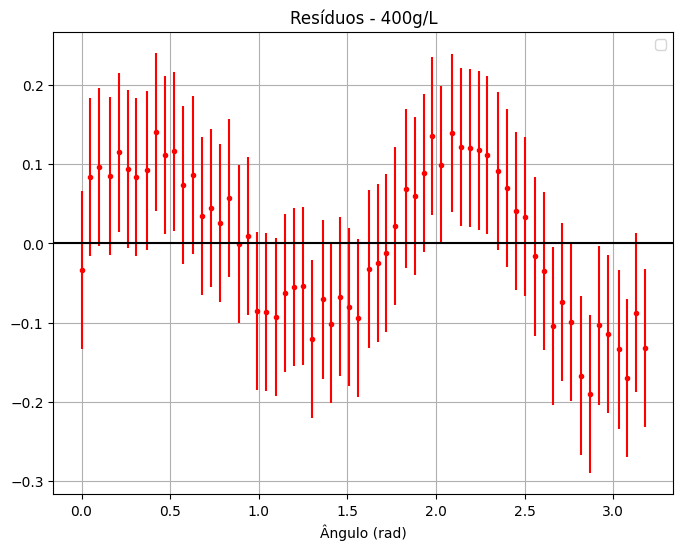

In [11]:
#Resíduos:
def x0(x):
    return 0

yAjuste = []
for i in xData:
    yAjuste.append(func(i, i0_p, a_p))

residuosAbsolutos = []
for i, ponto in enumerate(yAjuste):
    residuosAbsolutos.append(yData[i] - yAjuste[i])

chiQuadrado2 = 0

print(len(xData))

for i, residuo in enumerate(residuosAbsolutos):
    chiQuadrado2 += residuosAbsolutos[i]**2/Dy[i]**2

print("Chi quadrado = %1.2f" % chiQuadrado2)

def dataPlot2(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    grafico = f.add_subplot(111)
    # plot dos resíduos
    grafico.plot(xData, residuosAbsolutos, 'D', marker = '.', color = 'red')

    # plot das barras de erro
    grafico.errorbar(xData, residuosAbsolutos, yerr = Dy, ls='None', color = 'red')

    grafico.grid(True)
    grafico.axhline(0,0, max(xData), color = 'black')
    grafico.set_xlabel('Ângulo (rad)') # eixo x
    grafico.set_title('Resíduos - 400g/L') #título
    grafico.legend(loc = 'upper right')
    
    plt.savefig('Resíduos400.png')
    plt.show()
    plt.close('all')

graphWidth = 800
graphHeight = 600
dataPlot2(graphWidth, graphHeight)